In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018
Processamento de sinais UnB Gama
@author: mrclnndrd
"""
%matplotlib notebook 
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [14]:
t=list(range(-100,100))

t=np.dot(t,0.01)

f=np.sin(2*t)+np.exp(0.1*t)

f_par=(np.sin(2*t)+np.exp(0.1*t) + np.sin(-2*t)+np.exp(-0.1*t))/2

f_impar=(np.sin(2*t)+np.exp(0.1*t) - (np.sin(-2*t)+np.exp(-0.1*t)))/2

<IPython.core.display.Javascript object>


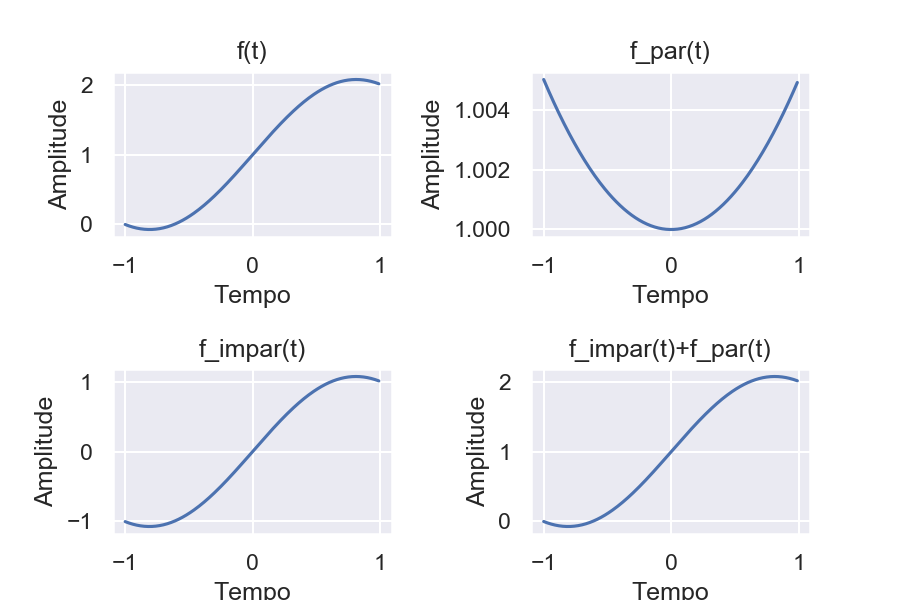

In [15]:
fig = plt.subplots(figsize=(6,4))
plt.subplots_adjust(wspace=.5, hspace=.8)

ax1=plt.subplot(2, 2, 1)  
ax1.plot(t,f)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Tempo')
ax1.set_title('f(t)')

ax2=plt.subplot(2, 2, 2)  
ax2.plot(t,f_par)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Tempo')
ax2.set_title('f_par(t)')

ax31=plt.subplot(2, 2, 3)  
ax31.plot(t,f_impar)
ax31.set_ylabel('Amplitude')
ax31.set_xlabel('Tempo')
ax31.set_title('f_impar(t)')

ax4=plt.subplot(2, 2, 4)  
ax4.plot(t,f_impar+f_par)
ax4.set_ylabel('Amplitude')
ax4.set_xlabel('Tempo')
ax4.set_title('f_impar(t)+f_par(t)')

plt.savefig('Aula1.jpeg',dpi=300)



<IPython.core.display.Javascript object>


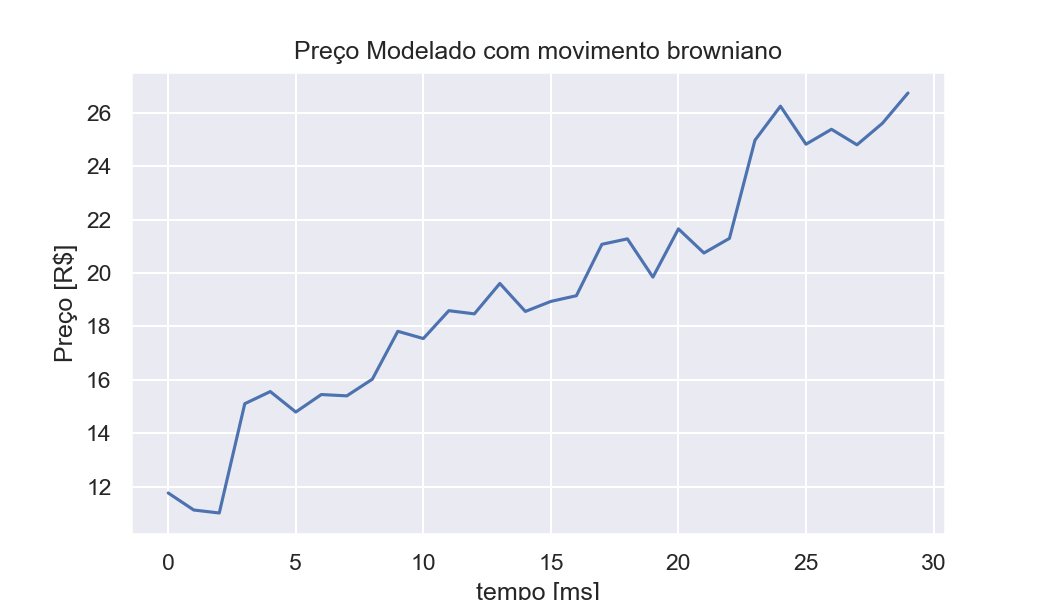

Text(0.5, 1.0, 'Preço Modelado com movimento browniano')

In [5]:
po=12

mu=.5
sigma=1.3
w = np.random.normal(0,1, 30)
t=np.arange(0,30)


p1=po+mu*t+sigma*w

fig = plt.subplots(figsize=(7, 4))
plt.plot(p1)
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Preço Modelado com movimento browniano')


<IPython.core.display.Javascript object>


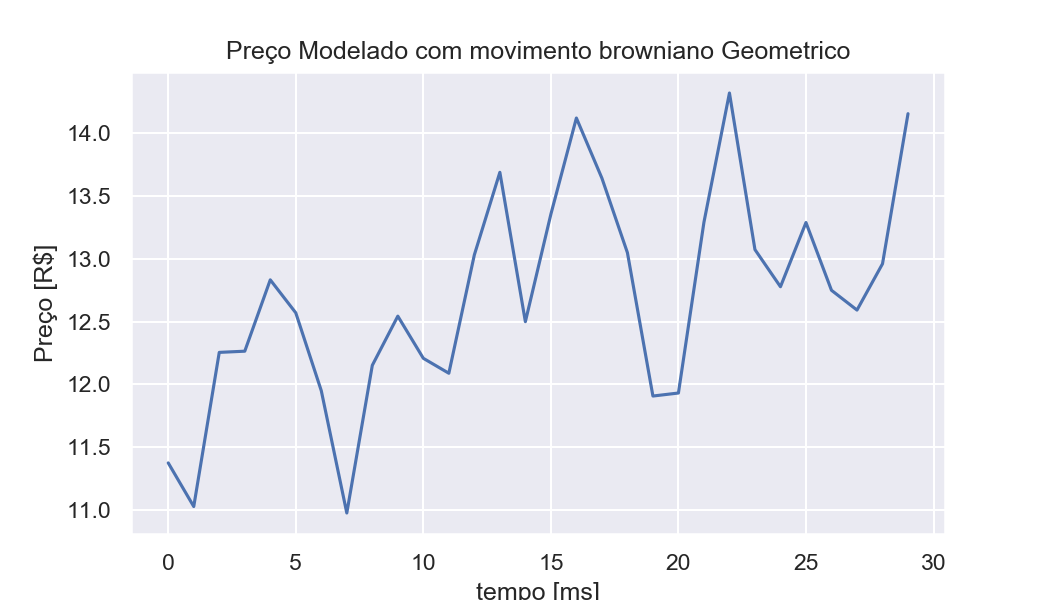

Text(0.5, 1.0, 'Preço Modelado com movimento browniano Geometrico')

In [6]:
po=12
mu=.005
sigma=.05
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(7, 4))
plt.plot(p2)
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Preço Modelado com movimento browniano Geometrico')


In [1]:
from scipy import signal
def butter_bandpass(lowcut, highcut, fs, order=4):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a =signal.butter(order, [low, high], btype='band')
        return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        y = signal.lfilter(b, a, data)
        return y
    
def response_frequency(sinal,fs): 
        rf = np.abs(np.fft.fft(sinal))
        tp=np.arange(0,len(sinal)/fs,1/fs)
        fq = np.fft.fftfreq(tempo.shape[-1])
        return fq, rf
 

In [2]:
import scipy.io
mat = scipy.io.loadmat('emgsinal.mat')
fs=2048
emg=mat.get('emgl')
emg=[emg[k][0] for k in range(len(emg))]
emg_f=butter_bandpass_filter(emg, 2, 200, fs, order=4)
butter_bandpass(2, 200, fs, order=1)[1]

array([ 1.        , -1.51977817,  0.52273528])

<IPython.core.display.Javascript object>


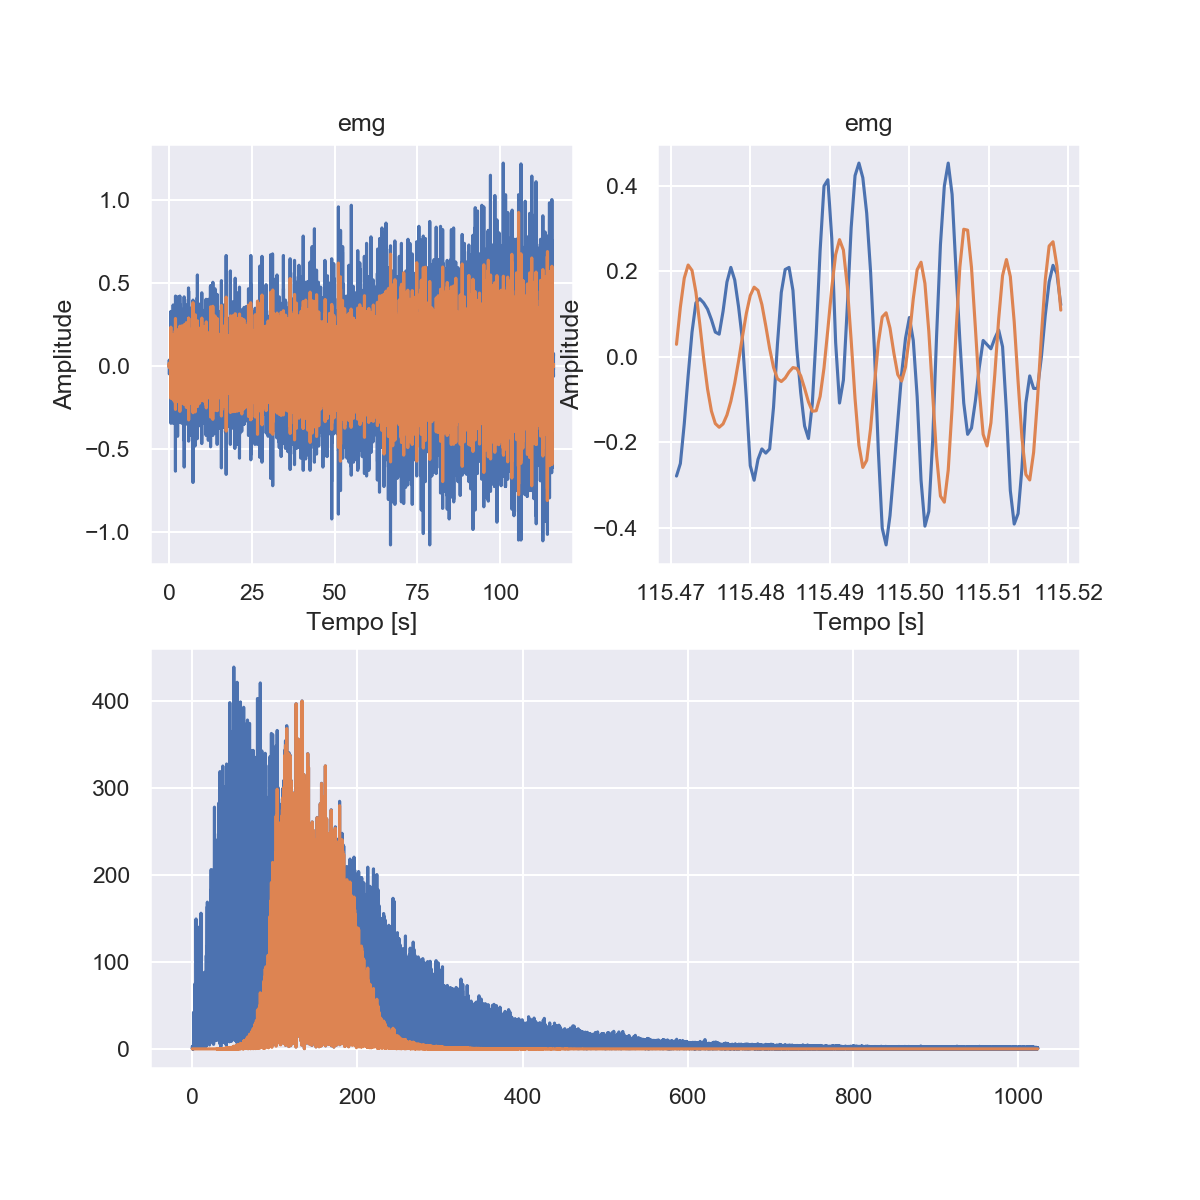

In [12]:
butter=butter_bandpass(20, 400, 2048, order=2)
import scipy.io
mat = scipy.io.loadmat('emgsinal.mat')
#print(mat)
fs=2048

emg=mat.get('emgl')
emg=[emg[k][0] for k in range(len(emg))]
emg_f=butter_bandpass_filter(emg, 100, 200, fs, order=4)

tempo=np.arange(0,len(emg)/fs,1/fs)
fig = plt.subplots(figsize=(8,8))
#plt.subplots_adjust(wspace=.5, hspace=.5)

ax1=plt.subplot(2, 2, 1)  
ax1.plot(tempo,emg)
ax1.plot(tempo,emg_f)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Tempo [s]')
ax1.set_title('emg')

ax2=plt.subplot(2, 2, 2)  
ax2.plot(tempo[-1300:-1200],emg[-1300:-1200])
ax2.plot(tempo[-1300:-1200],emg_f[-1300:-1200])
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Tempo [s]')
ax2.set_title('emg')

ax3=plt.subplot(2, 1, 2)  
fq, rf=response_frequency(emg,fs)
fq_f, rf_f=response_frequency(emg_f,fs)

ax3.plot(fs*fq[:np.min(np.where(fq<0))],rf[:np.min(np.where(fq<0))])
ax3.plot(fs*fq_f[:np.min(np.where(fq<0))],rf_f[:np.min(np.where(fq<0))])
#ax3.plot(FR_EMG_F,PS_EMG_F)
#ax3.set_ylabel('Amplitude')
#ax3.set_xlabel('Frequencias [Hz]')
#ax3.set_title('emg')
plt.savefig('Aula1.jpeg',dpi=300)


In [77]:
emg[np.min(np.where(fq<0)):]

[-0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.005959239754602663,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 0.00380676024539639,
 0.00380676024539639,
 0.00380676024539639,
 0.00380676024539639,
 0.00380676024539639,
 0.00380676024539639,
 -0.0010762397546031366,
 -0.0010762397546031366,
 0.00380676024539639,
 0.00380676024539639,
 0.00380676024539639,
 0.00380676024539639,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.0010762397546031366,
 -0.00

In [ ]:
emg=[emg[k][0] for k in range(len(emg))]


<IPython.core.display.Javascript object>


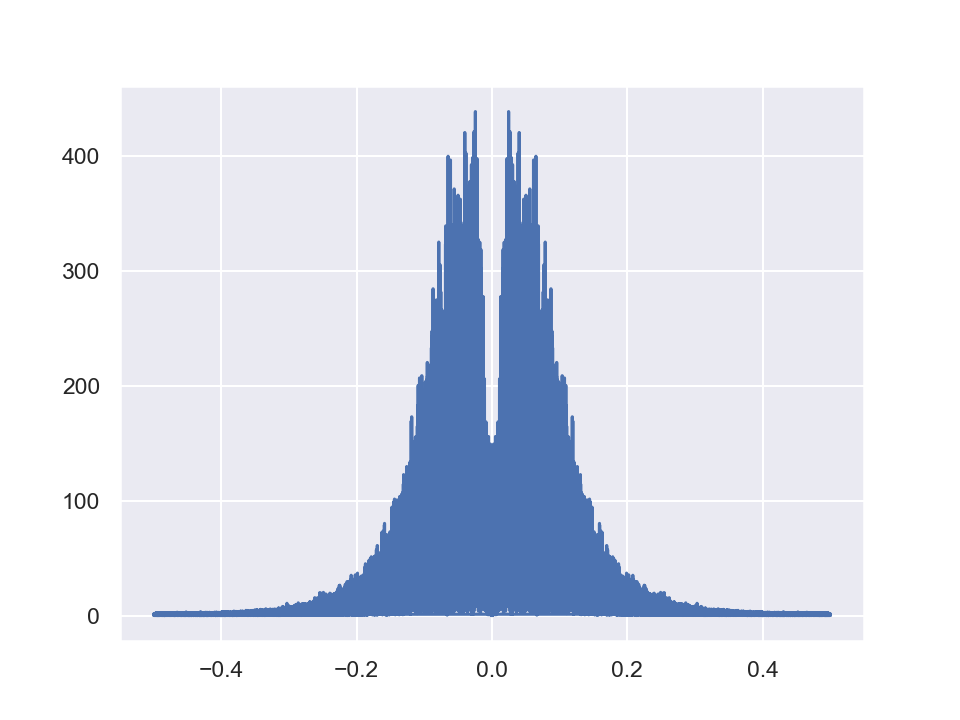

In [76]:
%matplotlib notebook 

sp = np.fft.fft(emg)
freq = np.fft.fftfreq(tempo.shape[-1])
plt.plot(freq,np.abs(sp))